## Customer Segmentation Using Walmart Dataset

### Walmart is a the biggest grocery store with its global presense.In this project we try to explore the categories of customers based on their demographics and the speding behavious using clustering algorithms and create an app to categororise the new customer category.

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 


#### Dataset Loading

In [93]:
df=pd.read_csv("walmart.csv")
df.head(100)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,68,10,A,2,0,3,8370
1,1000001,P00248942,F,68,10,A,2,0,1,15200
2,1000001,P00087842,F,68,10,A,2,0,12,1422
3,1000001,P00085442,F,68,10,A,2,0,12,1057
4,1000002,P00285442,M,46,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
95,1000019,P00251642,M,57,10,A,3,0,1,4211
96,1000019,P00244842,M,57,10,A,3,0,11,1539
97,1000021,P00220242,M,20,16,B,0,0,3,3055
98,1000022,P00351142,M,66,15,A,4+,0,1,12099


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  int64 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [97]:
df.shape

(550068, 10)

In [99]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                              59
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [101]:
df.describe()

,User_ID,Age,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,46.323685,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,17.133785,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,17.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,32.000000,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,46.000000,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,62.000000,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,75.000000,20.000000,1.000000,20.000000,23961.000000


In [103]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                            int64
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [105]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values

In [107]:
df.duplicated().sum()

0

There are no duplicate rows.

In [116]:
df_new=df.groupby(['User_ID','Age'])['Purchase'].sum().reset_index()
df_new.head()

,User_ID,Age,Purchase
0,1000001,68,334093
1,1000002,46,810472
2,1000003,52,341635
3,1000004,25,206468
4,1000005,70,821001


### I have decided to study the spending behaviour of the customers based on their age.Therefore, i created another daaframe with the said columns as a pre-processing step

In [119]:
# creating a new dataframe
df1=pd.DataFrame(df_new,columns=['Age','Purchase']).reset_index(drop=True)

In [121]:
df1

,Age,Purchase
0,68,334093
1,46,810472
2,52,341635
3,25,206468
4,70,821001
...,...,...
5886,20,4116058
5887,30,1119538
5888,41,90034
5889,26,590319


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       5891 non-null   int64
 1   Purchase  5891 non-null   int64
dtypes: int64(2)
memory usage: 92.2 KB


As 'Gender' and Age are categorical variables will map them to numerical value to prepare the data for one hot encoding

In [126]:
df1.head()

,Age,Purchase
0,68,334093
1,46,810472
2,52,341635
3,25,206468
4,70,821001


In [128]:
# Standardising the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df1)

final=pd.DataFrame(scaled_data,columns=df1.columns)

In [130]:
final.head()

,Age,Purchase
0,1.295669,-0.562679
1,0.000220,-0.057807
2,0.353524,-0.554686
3,-1.236345,-0.697937
4,1.413437,-0.046648


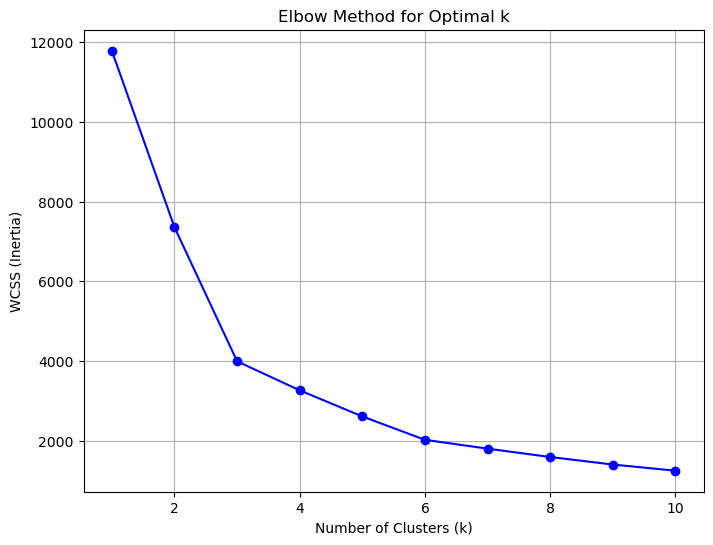

In [132]:
# Elbow  Method to find optimal k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store the WCSS values for each k
wcss = []

# Loop through values of k 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(final) 
    wcss.append(kmeans.inertia_) 

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


for us the optimal clusters is k=6

In [135]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = final[['Age', 'Purchase']]

# Fit the KMeans model
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)  

# Store the cluster labels in the variable 'y' 
y = kmeans.labels_



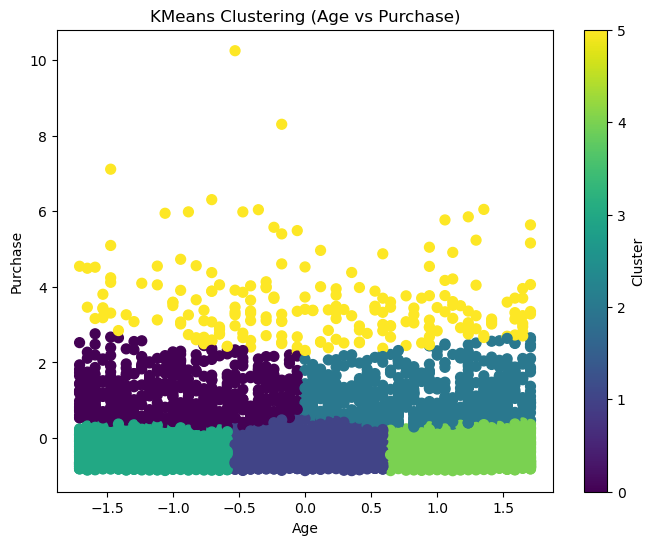

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(final['Age'], final['Purchase'], c=y, cmap='viridis', s=50)
plt.title('KMeans Clustering (Age vs Purchase)')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.colorbar(label='Cluster')
plt.show()


In [139]:
y

array([4, 1, 1, ..., 1, 3, 0])

In [141]:
# Get the cluster centers 
cluster_centers = kmeans.cluster_centers_

# Display the cluster centers
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[-0.90121605  1.09935765]
 [ 0.03881744 -0.42757694]
 [ 0.88501124  1.0844562 ]
 [-1.13976    -0.4393799 ]
 [ 1.17773651 -0.4363848 ]
 [ 0.10536997  3.53243149]]


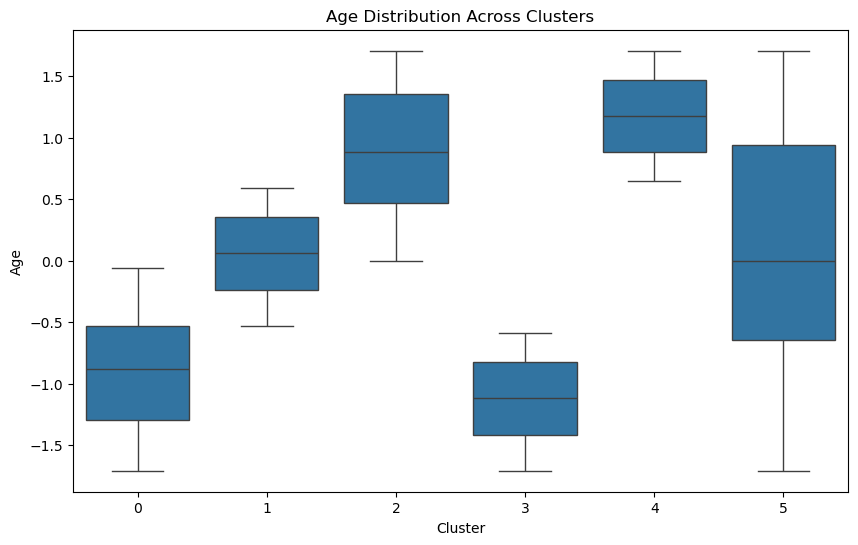

In [143]:
final_with_clusters = final.copy()
final_with_clusters['Cluster'] = y

# Plot the distribution of 'Age' for each cluster (x-axis is 'Cluster', y-axis is 'Age')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=final_with_clusters)
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

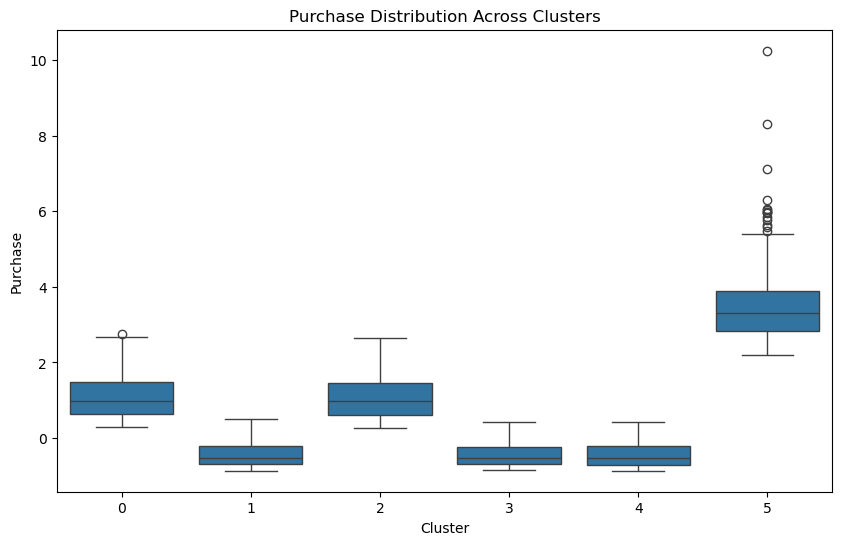

In [145]:
# Plot the distribution of 'Purchase' for each cluster (x-axis is 'Cluster', y-axis is 'Age')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Purchase', data=final_with_clusters)
plt.title('Purchase Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Purchase')
plt.show()

In [147]:
# Group by 'Cluster' and get the mean of 'Age' and 'Purchase' for each cluster
cluster_profile = final_with_clusters.groupby('Cluster')[['Age', 'Purchase']].mean()
print(cluster_profile)


              Age  Purchase
Cluster                    
0       -0.902846  1.097586
1        0.038817 -0.427577
2        0.883072  1.087469
3       -1.139760 -0.439380
4        1.177696 -0.435844
5        0.105370  3.532431


In [149]:
from sklearn.metrics import silhouette_score

# Get the predicted cluster labels (y from KMeans)
cluster_labels = kmeans.labels_

# Compute the Silhouette Score for your clustering
silhouette_avg = silhouette_score(final[['Age', 'Purchase']], cluster_labels)

# Display the result
print(f"The Silhouette Score is: {silhouette_avg}")


The Silhouette Score is: 0.41869326935638945


In [151]:
# Try different numbers of clusters (from 2 to 10)
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(final[['Age', 'Purchase']])
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(final[['Age', 'Purchase']], kmeans.labels_)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score for 2 clusters: 0.4130933838352684
Silhouette Score for 3 clusters: 0.4755153901743037
Silhouette Score for 4 clusters: 0.4580262664266672
Silhouette Score for 5 clusters: 0.4337967865633756
Silhouette Score for 6 clusters: 0.41910724774800606
Silhouette Score for 7 clusters: 0.41074181796680403
Silhouette Score for 8 clusters: 0.40525050890706943
Silhouette Score for 9 clusters: 0.37874817467233163
Silhouette Score for 10 clusters: 0.3853813250220488


In [157]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = final[['Age', 'Purchase']]

# Fit the KMeans model
kmeans_new = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_new.fit(X)  

y = kmeans_new.labels_



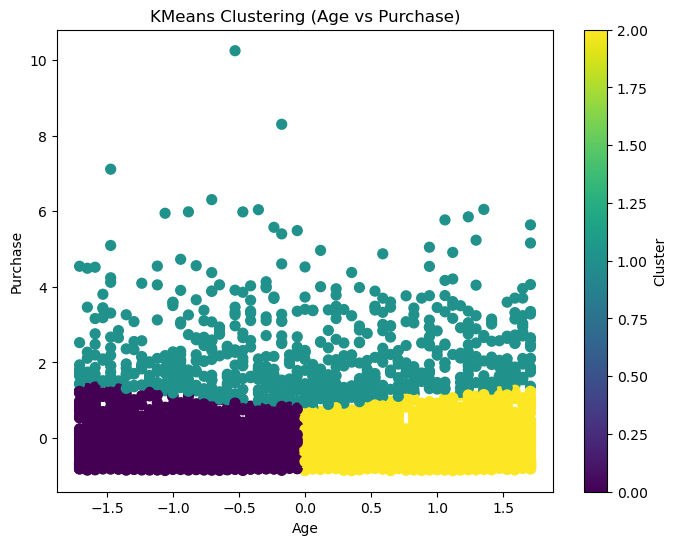

In [159]:
# Optional: Visualize the clusters (Age vs Purchase)
# Optional: Visualize the clusters (Age vs Purchase)
plt.figure(figsize=(8, 6))
plt.scatter(final['Age'], final['Purchase'], c=y, cmap='viridis', s=50)
plt.title('KMeans Clustering (Age vs Purchase)')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.colorbar(label='Cluster')
plt.show()


In [161]:
from sklearn.metrics import silhouette_score

# Get the predicted cluster labels (y from KMeans)
cluster_labels = kmeans_new.labels_

# Compute the Silhouette Score for your clustering
silhouette_avg = silhouette_score(final[['Age', 'Purchase']], cluster_labels)

#  Display the result
print(f"The Silhouette Score is: {silhouette_avg}")


The Silhouette Score is: 0.4754034747559875


In [165]:
centroids_original_scale = scaler.inverse_transform(kmeans_new.cluster_centers_)
print(centroids_original_scale)

[[3.08454050e+01 5.83701215e+05]
 [4.68153409e+01 2.92121597e+06]
 [6.06319206e+01 5.88137449e+05]]


C:\Users\haris\AppData\Local\Temp\ipykernel_11008\2430119870.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Purchase', data=average_purchase_per_cluster, palette='viridis')


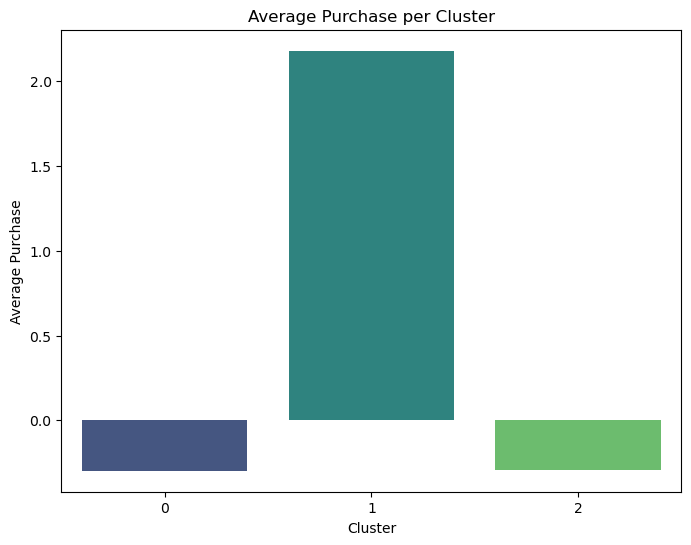

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

final['Cluster']=kmeans_new.labels_
# Calculate the mean Purchase per cluster
average_purchase_per_cluster = final.groupby('Cluster')['Purchase'].mean().reset_index()

# Create a bar plot to show average Purchase for each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Purchase', data=average_purchase_per_cluster, palette='viridis')

# Add labels and title
plt.title('Average Purchase per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase')
plt.show()


In [171]:
# Mapping the clusters to the new descriptive labels
final['Customer_type'] = final['Cluster'].map({
    0: 'Eamerging Shoppers',  
    1: 'Prime Spenders',    
    2: 'Golden Year Economists'   
})


In [173]:
final

,Age,Purchase,Cluster,Customer_type
0,1.295669,-0.562679,2,Golden Year Economists
1,0.000220,-0.057807,2,Golden Year Economists
2,0.353524,-0.554686,2,Golden Year Economists
3,-1.236345,-0.697937,0,Eamerging Shoppers
4,1.413437,-0.046648,2,Golden Year Economists
...,...,...,...,...
5886,-1.530765,3.445490,1,Prime Spenders
5887,-0.941925,0.269745,0,Eamerging Shoppers
5888,-0.294200,-0.821335,0,Eamerging Shoppers
5889,-1.177461,-0.291128,0,Eamerging Shoppers


In [201]:
new_record = np.array([[40,10000]])  

# Scale the new record using the same scaler
new_record_scaled = scaler.transform(new_record)

predicted_cluster = kmeans_new.predict(new_record_scaled)

# Get the corresponding cluster label
predicted_cluster_label = cluster_label[predicted_cluster[0]]

# Output the predicted cluster label
print(f"The new record belongs to cluster {predicted_cluster[0]}: {predicted_cluster_label}")


C:\Users\haris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\haris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


The new record belongs to cluster 0: Emerging Shoppers


### Saving the model

In [206]:
import pickle

In [208]:
pickle.dump(kmeans_new,open('kmeans_new.pkl','wb'))
kmeans_new=pickle.load(open('kmeans_new.pkl','rb'))

In [212]:
pickle.dump(scaler,open('scaler.pkl','wb'))
scaler=pickle.load(open('scaler.pkl','rb'))